# Grip :- Spark foundation

# Prediction using Decision Tree Algorithm

**Task:
To create the decision tree classifier and visualize it graphically.**

# Author:- Gaurav Balavant Suryavanshi 

In [1]:
# To import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# To import datasets
a=pd.read_csv('iris.csv')

iris=pd.DataFrame(a)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# to id column is not for use therefor drop out it
iriss=iris.drop(columns=['Id'])
iriss

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# to get count of target variable "Speciec
iriss.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
iriss.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now the target variable is converted to integer so that it is easy for further analysis  

In [9]:
# to categorical target variable using labelEncoder
label=preprocessing.LabelEncoder()
iriss.Species=label.fit_transform(iriss.Species)
iriss.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [11]:
# to check whether the variable is NAN and return in boolean value
iriss.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Therefore no any NAN value prisent in dataset

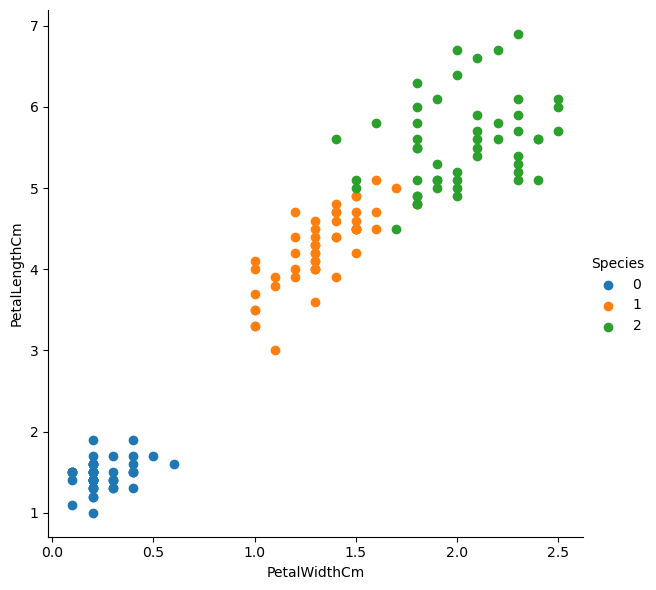

In [12]:
# to visualize the data by scatterplot
# a multi-axes grid with subplots visualizing the distribution of variables of a dataset and the relationship between multiple variables.
import seaborn as sns
sns.FacetGrid(iriss,hue="Species",size=6).map(plt.scatter,"PetalWidthCm","PetalLengthCm").add_legend()

from above it is clear that cluster 0 is completely classifies but the class 1 and class 2 are mixed

In [23]:
# to split the dataset into target and independent variable
x=iriss.iloc[:,0:4] # independent variable excluding target
y=iriss.iloc[:,4]  # dependent variable i.e target variable
x
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [83]:
# train the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [84]:
y_test

38     0
66     1
115    2
117    2
89     1
136    2
68     1
94     1
84     1
28     0
90     1
11     0
40     0
126    2
79     1
144    2
123    2
124    2
76     1
59     1
132    2
105    2
53     1
17     0
64     1
18     0
13     0
116    2
9      0
81     1
Name: Species, dtype: int32

In [85]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3
136,6.3,3.4,5.6,2.4
68,6.2,2.2,4.5,1.5
94,5.6,2.7,4.2,1.3
84,5.4,3.0,4.5,1.5
28,5.2,3.4,1.4,0.2


In [86]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [87]:

y_train

62    1
23    0
26    0
48    0
2     0
     ..
71    1
12    0
50    1
7     0
70    1
Name: Species, Length: 120, dtype: int32

In [88]:
y_train.value_counts()

0    42
2    40
1    38
Name: Species, dtype: int64

In [91]:
# fit the model
from sklearn.tree  import  DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion='entropy',max_depth=3)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

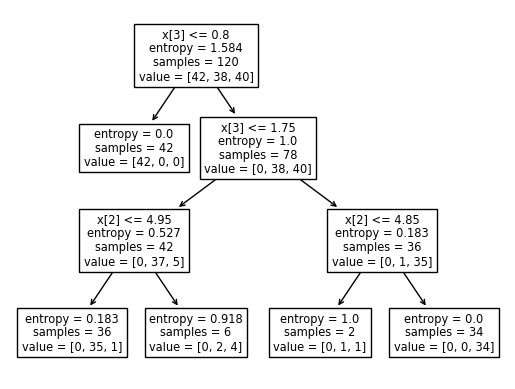

In [92]:
#from sklearn import tree
from sklearn import tree
tree.plot_tree(classifier)
plt.show() 

In [93]:
# creating the feature names and again plot tree
fn=['SeplaLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] # independent feature
cn=['setosa','versicolour','virginica'] # dependent feature

In [94]:
# plot again decision tree
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=400)
tree.plot_tree(classifier,feature_names=fn,class_names=cn,filled=True);


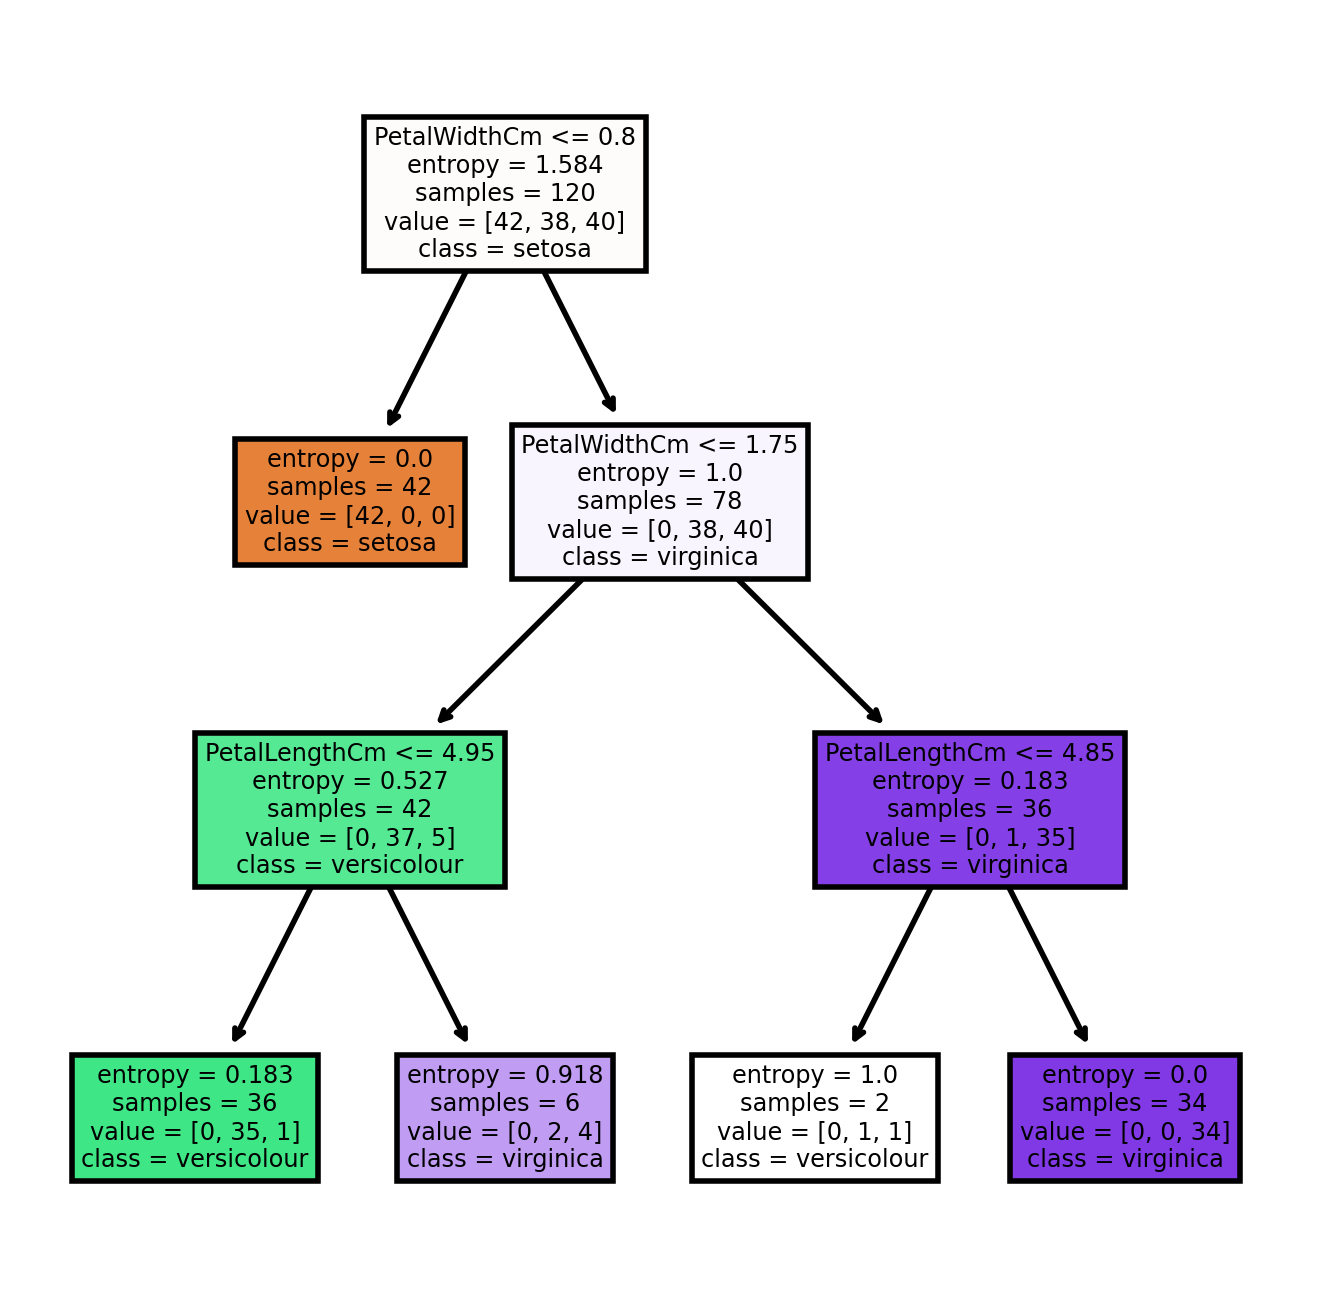

In [95]:
plt.show()

The root node with the highest entropy is 1.584 is the PetalWidthCm,attribute the first class setosa is completely classified next the verginica and then versicolor are classified

In [96]:
# Predicting on the test data
predicted=classifier.predict(x_test)
pd.Series(predicted).value_counts()

1    13
2     9
0     8
dtype: int64

In [97]:
y_test
y_test.value_counts()

1    12
2    10
0     8
Name: Species, dtype: int64

In [98]:
#it gives a table to understand correct and wrong prediction
import pandas as pd
pd.crosstab(y_test,predicted)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


From the above table 1 class is missclassified by the model

In [99]:
#check accuracy of the model
np.mean(pred==y_test)

0.9666666666666667

The decision tree classifierr provides an accuracy of 96.67% for the prediction of the Species.
So, now when any test data is provided for the classifier it would able to predict the correct class accordingly. 